In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

### Exploring smaller dataset of 100k ratings

In [2]:
ratings_small = pd.read_csv('./Raw Data/ratings_small.csv')
tags_small = pd.read_csv('./Raw Data/tags_small.csv')
movies_small = pd.read_csv('./Raw Data/movies_small.csv')

### Column lists:

ratings: ['userId', 'movieId', 'rating', 'timestamp']

tags: ['userId', 'movieId', 'tag', 'timestamp']

movies : ['movieId', 'title', 'genres']

In [3]:
df_small = pd.merge(ratings_small, movies_small, on='movieId')

Only 610 unique IDs

### Let's explore the larger dataset of 27M reviews

In [4]:
ratings = pd.read_csv('./Raw Data/ratings_large.csv')
tags = pd.read_csv('./Raw Data/tags_large.csv')
movies = pd.read_csv('./Raw Data/movies_large.csv')
genome_scores = pd.read_csv('./Raw Data/genome-scores_large.csv')
genome_tags = pd.read_csv('./Raw Data/genome-tags_large.csv')
links = pd.read_csv('./Raw Data/links_large.csv')

In [5]:
large_dfs = [(ratings, 'ratings'), (tags,'tags'), (movies, 'movies'), (genome_scores, 'genome_scores')
             , (genome_tags,'genome_tags'), (links,'links')]

for df,name in large_dfs:
    print(f'{name}')
    print(f'Columns: {list(df.columns)}')
    has_id = 'True' if 'movieId' in list(df.columns) else 'False'
    print(f'Has movieId: {has_id}')
    #print(f'Has movieId: {'True' if 'movieId' in list(df.columns) else 'False'}')
    print(f'shape: {df.shape}')
    print(f'nulls: ')
    print(f'{df.isnull().sum()}')
    
    print('')

ratings
Columns: ['userId', 'movieId', 'rating', 'timestamp']
Has movieId: True
shape: (27753444, 4)
nulls: 
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

tags
Columns: ['userId', 'movieId', 'tag', 'timestamp']
Has movieId: True
shape: (1108997, 4)
nulls: 
userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

movies
Columns: ['movieId', 'title', 'genres']
Has movieId: True
shape: (58098, 3)
nulls: 
movieId    0
title      0
genres     0
dtype: int64

genome_scores
Columns: ['movieId', 'tagId', 'relevance']
Has movieId: True
shape: (14862528, 3)
nulls: 
movieId      0
tagId        0
relevance    0
dtype: int64

genome_tags
Columns: ['tagId', 'tag']
Has movieId: False
shape: (1128, 2)
nulls: 
tagId    0
tag      0
dtype: int64

links
Columns: ['movieId', 'imdbId', 'tmdbId']
Has movieId: True
shape: (58098, 3)
nulls: 
movieId      0
imdbId       0
tmdbId     181
dtype: int64



# This dataset is far too large to run for this type of project. I'm going to swtich gears to a 1M dataset. 

In [6]:
ratings = pd.read_csv('./Raw Data/ratings_1m.dat', sep='::', header=None, names=['user_id', 'movie_id', 'rating', 'timestamp'])
ratings.rename(columns={'movie_id':'movieId'}, inplace=True)

/Users/jacqueline/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [7]:
users = pd.read_csv('./Raw Data/users_1m.dat', sep='::', header=None, names=['sex', 'age', 'occupation', 'user_id'])
users

,sex,age,occupation,user_id
1,F,1,10,48067
2,M,56,16,70072
3,M,25,15,55117
4,M,45,7,02460
5,M,25,20,55455
...,...,...,...,...
6036,F,25,15,32603
6037,F,45,1,76006
6038,F,56,1,14706
6039,F,45,0,01060


In [8]:
#movies = pd.read_csv('./Raw Data/movies_1m.dat', sep='::', header=None, names=['title', 'genre'])
#movies

### Let's explore these dataframe variables to better understand which we will want for modeling

Self explanatory dataframes are: ratings, movies, links

the tags dataframe has a column 'tag' which has a descriptor. examples are:'fun', 'epic', 'pacing', 'dinosaurs', 'lawn mower'. our datasets did not come with a data dictionary, but these words could come from imdb comments. 

the genome_scores dataframe has a relevance column ranging from 0 - 1.

the genome_tags dataframe is similar to the tags dataframe. it has 1128 unique tags. examples are: 'aliens', 'technology', 'too long', 'frightening'

## Initial cleaning
1) merge ratings and movies on movieId

2) explore number of ratings through sparsity measures

In [9]:
df = pd.merge(ratings_small, movies_small, on='movieId', how='left')
#timestamp is not needed
df.drop(columns=['timestamp'], inplace=True)
df.rename(columns={'user_id':'userId'}, inplace=True)
df.head(5)

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [10]:
df.dropna(inplace=True)

In [11]:
df.dtypes

userId       int64
movieId      int64
rating     float64
title       object
genres      object
dtype: object

In [12]:
#for title in df['title']:
#        if '12' not in title.str:
#            print(title)

In [13]:
#for row in range(0,df.shape[0]+1)
#    for title in df['title']:
#        if '12' not in title:
#            np.delete(df[row])
#        elif '12' in title and '(' not in title:
#            df['year'] = df['title'].str[-5:-1]
#        else:
#            df['year'] = df['title'].str[-6:-2]

In [14]:
#df['year'] = df['title'].str[-5:-1]

In [15]:
#df['year'].unique()

In [16]:
#years = []    
#for title in df['title']:
#    years.append(re.search('\(([^)]+)', title).group())

#df['year'] = years

In [17]:
#[print(i) for i in list(df['title'][1:50])]

All but 6739 rows have parenthesis. This represents 

In [18]:
count = 0

for title in df['title'].str:
    if '(' in title:
        count+=1

/var/folders/l_/zmpwb1k10n73190173cr1g300000gn/T/ipykernel_1763/2269221584.py:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  for title in df['title'].str:


In [19]:
print(f'Titles without parentheses: {df.shape[0] - count}')
print(f'Percent without parentheses: {count / df.shape[0]}')

Titles without parentheses: 100836
Percent without parentheses: 0.0


In [20]:
#movie labels have their year in parenthesis - let's examine!
#df['year'] = df['title'].str.extract('\(([^)]+)', expand=True) 
#df['year'] = df['title'].str.extract('\([1-2][0-9]{3}\)', expand=False)
df['year'] = df['title'].str.extract('.*\((.*)\).*',expand = False)
#df['year'] = df[df['title'].str.find('(')+1:df['title'].str.find(')')]
#df['year'] = re.search('\(([^)]+)', df['title'].str)
#df['year'] = df['title'].str.split('(', 1)[1].split(')')[0]
#df.head()

In [21]:
df['year'].nunique()

107

A sparsity of .998 is too high. We probably have a good amount of users with a minimal number of ratings. There are two approaches to reducing sparsity. One is removing users with minimal # ratings. The second is removing movies with minimal ratings. In order to determine these thresholds, let's look into the numbers and then filter through groupby's.

In [22]:
#Check sparsity of matrix
ratings_count = len(df['rating'])
users_count = len(df['userId'].unique())
movies_count = len(df['movieId'].unique())

sparse = 1 - (ratings_count / (users_count*movies_count))
sparse

0.9830003169443864

Figure out solid marker for minimum amounts of ratings per user and ratings per movies

In [23]:
df.copy().groupby('userId')['movieId'].count().describe()

count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: movieId, dtype: float64

In [24]:
df.copy().groupby('movieId')['userId'].count().describe()

count    9724.000000
mean       10.369807
std        22.401005
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       329.000000
Name: userId, dtype: float64

In [25]:
def description(grouped_column, column2):
    print(grouped_column)
    print(f'nunique: {df[grouped_column].nunique()}')
    print(f'min: {df.copy().groupby(grouped_column)[column2].count().min()}')
    print(f'max: {df.copy().groupby(grouped_column)[column2].count().max()}')
    print('***********')

description('movieId', 'userId')
description('userId', 'movieId')

movieId
nunique: 9724
min: 1
max: 329
***********
userId
nunique: 610
min: 20
max: 2698
***********


Check sparsity test on new df with less NaNs

In [26]:
user_min = 30
movie_min = 7

df2 = df.copy().groupby('userId').filter(lambda x: len(x)>user_min)
df2 = df2.copy().groupby('movieId').filter(lambda x: len(x)>movie_min)

In [27]:
ratings_count = len(df2['rating'])
users_count = len(df2['userId'].unique())
movies_count = len(df2['movieId'].unique())

sparse = 1 - (ratings_count / (users_count*movies_count))
sparse
print(f' sparse: {sparse}, df length: {df.shape[0]}, df_test length: {df2.shape[0]}')
print(f"movie unique: df: {df['movieId'].nunique()}, df_test: {df2['movieId'].nunique()}")
print(f"user unique: df: {df['userId'].nunique()}, df_test: {df2['userId'].nunique()}")

 sparse: 0.9379172016865649, df length: 100836, df_test length: 81807
movie unique: df: 9724, df_test: 2646
user unique: df: 610, df_test: 498


Not enough change in sparsity. Will try more combinations.

In [28]:
user_min = 150
movie_min = 10

df2 = df.copy().groupby('userId').filter(lambda x: len(x)>user_min)
df2 = df2.copy().groupby('movieId').filter(lambda x: len(x)>movie_min)

In [29]:
ratings_count = len(df2['rating'])
users_count = len(df2['userId'].unique())
movies_count = len(df2['movieId'].unique())

sparse = 1 - (ratings_count / (users_count*movies_count))
print(f' sparse: {sparse}, df length: {df.shape[0]}, df_test length: {df2.shape[0]}')
print(f"movie unique: df: {df['movieId'].nunique()}, df_test: {df2['movieId'].nunique()}")
print(f"user unique: df: {df['userId'].nunique()}, df_test: {df2['userId'].nunique()}")

 sparse: 0.8286031887187957, df length: 100836, df_test length: 53966
movie unique: df: 9724, df_test: 1820
user unique: df: 610, df_test: 173


### Let's look at nulls

In [30]:
df2.isnull().sum()

userId     0
movieId    0
rating     0
title      0
genres     0
year       0
dtype: int64

In [31]:
#we have nulls in the year column. there are only 33 movies here will nulls. 
#wouldn't be too bad to input these values by hand.
df2[df2['year'].isnull()]['movieId'].nunique()

0

In [32]:
#title_null = list(df2[df2['year'].isnull()]['title'])

#title_yrnull = []
#[title_yrnull.append(title) for title in title_null if title not in title_yrnull]

In [33]:
df2.isnull().sum()

userId     0
movieId    0
rating     0
title      0
genres     0
year       0
dtype: int64

In [34]:
#let's impute movie year for movies with over 30 reviews
#movies=[]

#for movie in title_yrnull:
#    if df2['title'].value_counts()[movie] >= 30:
#        movies.append(movie)
#        print(f"{movie}: {df2['title'].value_counts()[movie]}")

In [35]:
#movies
#movies_years=['2016', '2016', '2016', '2018', '1980', '1976', '2016', '2019', '2018', '2014', '2017', '2005',
           # '1994', '2016', '2018', '2004', '2016']

#https://www.delftstack.com/howto/python/zip-lists-in-python/#:~:text=together%20in%20Python.-,Use%20zip()%20Function%20to%20Zip%20Two%20Lists%20in%20Python,a%20dictionary%2C%20or%20a%20set.
#zip_lists = zip(movies, movies_years)
#zip_dict = dict(zip_lists)

In [36]:
#df2['year'] = df2['title'].map(zip_dict)

#### Double check mapping function

In [37]:
#df2[df2['title'].isin(movies)].head(5)

In [38]:
#df2[df2['title'].isin(movies)].isnull().sum()

##### While we reviewed column statistics earlier, it's also important to understand value counts AKA popularity and the count ranges our data possesses

In [39]:
df2.columns

Index(['userId', 'movieId', 'rating', 'title', 'genres', 'year'], dtype='object')

In [40]:
def normal_counts(column):
    print(column)
    print(df2[column].value_counts(ascending=True, normalize=True))
    print("""
    *******************
    """)
    
normal_columns = ('rating', 'movieId', 'userId', 'year', 'genres')

for column in normal_columns:
    normal_counts(column)

rating
0.5    0.010470
1.5    0.015584
1.0    0.022570
2.5    0.059148
2.0    0.067765
4.5    0.090668
5.0    0.123652
3.5    0.143331
3.0    0.190083
4.0    0.276730
Name: rating, dtype: float64

    *******************
    
movieId
4967     0.000204
40732    0.000204
30822    0.000204
3198     0.000204
6753     0.000204
           ...   
296      0.002353
1196     0.002372
260      0.002483
2571     0.002502
356      0.002631
Name: movieId, Length: 1820, dtype: float64

    *******************
    
userId
564    0.001816
563    0.001853
74     0.002038
326    0.002057
33     0.002057
         ...   
448    0.017103
474    0.017400
68     0.018771
599    0.022310
414    0.026387
Name: userId, Length: 173, dtype: float64

    *******************
    
year
1922    0.000241
1934    0.000241
1947    0.000259
1938    0.000278
1936    0.000315
          ...   
1997    0.042101
2001    0.045807
1995    0.046418
1999    0.050624
2000    0.051996
Name: year, Length: 85, dtype: float64

    ***

In [41]:
print(df2['year'].nunique())
print(df2['year'].unique())

85
['1995' '1996' '1994' '1977' '1993' '1990' '1989' '1991' '1940' '1939'
 '1941' '1968' '1963' '1971' '1951' '1979' '1992' '1986' '1982' '1975'
 '1980' '1987' '1981' '1983' '1960' '1984' '1933' '1985' '1974' '1922'
 '1997' '1998' '1976' '1942' '1967' '1959' '1978' '1973' '1988' '1999'
 '1964' '1962' '1965' '1969' '2000' '1970' '1952' '1961' '1954' '1946'
 '1955' '1957' '2001' '1937' '2002' '2003' '2004' '2005' '2006' '1972'
 '1966' '1949' '1931' '1936' '2007' '2008' '2009' '2010' '2011' '2012'
 '2013' '2014' '2015' '2016' '2017' '1958' '1944' '1950' '1953' '1956'
 '1938' '1948' '1927' '1934' '1947']


### Initial EDA

In [42]:
#average ranking per year
#average ranking per genre
#genre per year

/Users/jacqueline/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


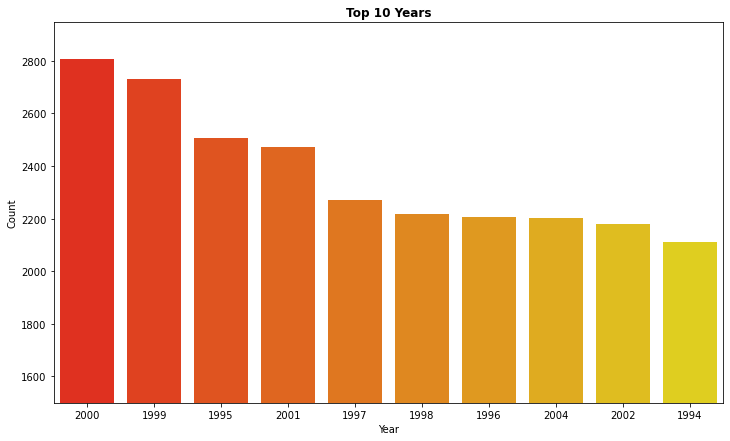

In [60]:
#Top 10 Years with the most movies produced.
plt.figure(figsize=(12,7))
topyear = df2.groupby('year').size().sort_values(ascending=False).head(10)
sns.barplot(topyear.index, topyear.values, palette='autumn')
plt.title('Top 10 Years', fontweight='bold')
plt.ylim(1500,)
plt.xlabel('Year')
plt.ylabel('Count')
#plt.xticks(rotation=40)
#plt.savefig('Visuals/year_counts', facecolor='w', transparent=False, dpi = 1000, bbox_inches='tight');

<BarContainer object of 19 artists>

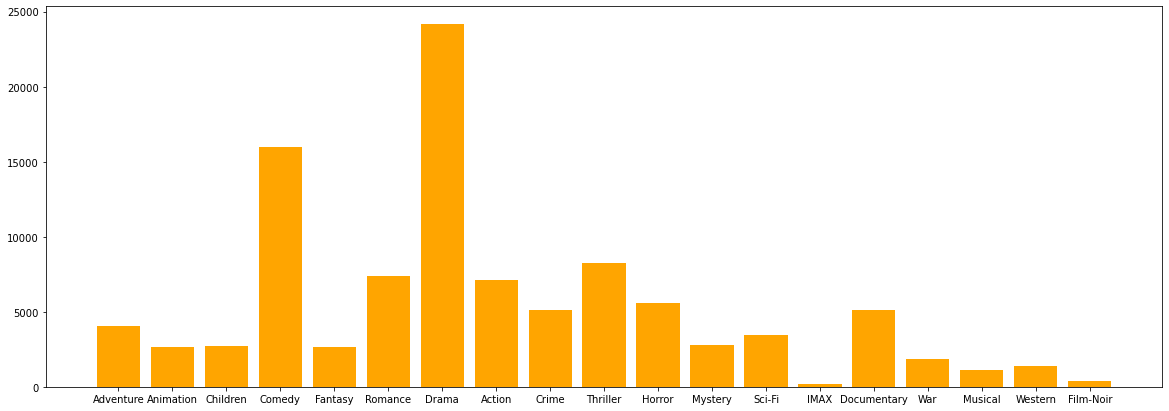

In [44]:
plt.figure(figsize=(20,7))
genrelist = movies['genres'].apply(lambda genre_list : str(genre_list).split("|"))
genres_count = {}

for genre_list in genrelist:
    for genre in genre_list:
        if(genres_count.get(genre,False)):
            genres_count[genre]=genres_count[genre]+1
        else:
            genres_count[genre] = 1       
genres_count.pop("(no genres listed)")
plt.bar(genres_count.keys(),genres_count.values(),color='orange')

In [45]:
ratings

,user_id,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [46]:
ratings.groupby('rating').count()

,user_id,movieId,timestamp
rating,,,
1,56174,56174,56174
2,107557,107557,107557
3,261197,261197,261197
4,348971,348971,348971
5,226310,226310,226310


<BarContainer object of 5 artists>

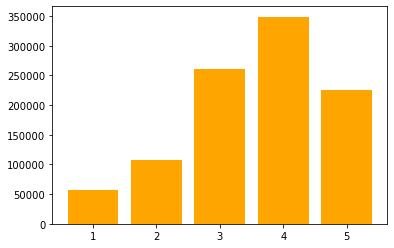

In [62]:
plt.bar(ratings.groupby('rating').count().index,ratings.groupby('rating').count()['movieId'], color='orange')
plt.title('Rating')

In [48]:
ratings_count = pd.DataFrame(ratings['rating'].value_counts(normalize=True))

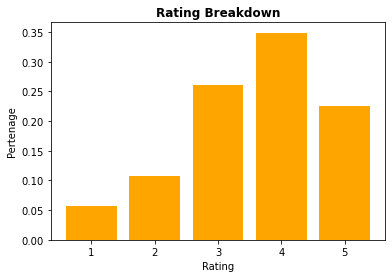

In [67]:
plt.bar(ratings_count.index, ratings_count['rating'], color='orange')
plt.title('Rating Breakdown', fontweight='bold')
plt.xlabel('Rating')
plt.ylabel('Pertenage')
#plt.savefig('Visuals/rating_breakdown', facecolor='w', transparent=False, dpi = 1000, bbox_inches='tight');

In [50]:
ratings_movies = ratings_small.copy()
ratings_movies.drop(columns='timestamp', inplace=True)
ratings_movies.drop(columns='movieId', inplace=True)

In [51]:
ratings_users_agg = ratings_movies.groupby('userId').agg([np.size, np.mean])

In [52]:
ratings_users_mean = pd.DataFrame(ratings_movies.copy().groupby('userId')['rating'].mean())
ratings_users_count = pd.DataFrame(ratings_movies.copy().groupby('userId')['rating'].count())

ratings_mean_count = pd.merge(ratings_users_mean, ratings_users_count, on='userId', how='inner')
ratings_mean_count.rename(columns={'rating_x':'mean_rating', 'rating_y':'count_rating'}, inplace=True)

In [53]:
ratings_mean_count[['count_rating']].describe()

,count_rating
count,610.000000
mean,165.304918
std,269.480584
min,20.000000
25%,35.000000
50%,70.500000
75%,168.000000
max,2698.000000


Text(0.5, 1.0, 'amount of ratings vs mean rating per user')

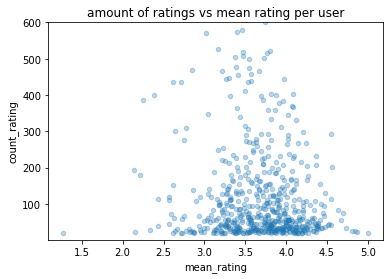

In [54]:
ratings_mean_count.plot.scatter(x='mean_rating', y='count_rating', alpha=.3)
plt.ylim(1,600)
plt.title('amount of ratings vs mean rating per user')